Dispersion (Variance) in Blood Pressure Before: 43.10189999999998
Dispersion (Variance) in Blood Pressure After: 46.97040000000002
Mean Blood Pressure Before: 133.91
Mean Blood Pressure After: 128.36
95% Confidence Interval (Blood Pressure Before): [124. 145.]
95% Confidence Interval (Blood Pressure After): [118. 141.]


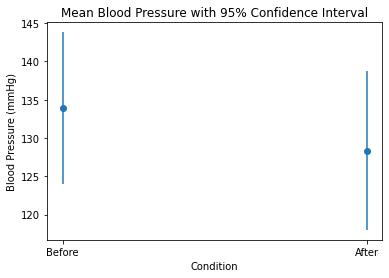

Mean Absolute Deviation (Blood Pressure Before): 5.7118
Mean Absolute Deviation (Blood Pressure After): 5.9
Standard Deviation (Blood Pressure Before): 6.5652037287505385
Standard Deviation (Blood Pressure After): 6.853495458523338
Correlation Coefficient: 0.9779485966556016
T-value: 46.35573256849115
P-value: 0.0


In [6]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from scipy import stats

try:
    # Download the CSV file from the URL and read it using pandas
    file_url = 'https://drive.google.com/uc?id=1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y'
    response = requests.get(file_url)
    data = response.content.decode('utf-8')
    df = pd.read_csv(StringIO(data))
    
    # Extract the 'Blood Pressure Before' and 'Blood Pressure After' columns as NumPy arrays
    blood_pressure_before = df[' Blood Pressure Before (mmHg)']
    blood_pressure_after = df[' Blood Pressure After (mmHg)']

    # a. Measure the dispersion in both and interpret the results
    before_dispersion = np.var(blood_pressure_before)
    after_dispersion = np.var(blood_pressure_after)
    print("Dispersion (Variance) in Blood Pressure Before:", before_dispersion)
    print("Dispersion (Variance) in Blood Pressure After:", after_dispersion)

    # b. Calculate mean and 5% confidence interval and plot it in a graph
    before_mean = np.mean(blood_pressure_before)
    after_mean = np.mean(blood_pressure_after)
    before_ci = np.percentile(blood_pressure_before, [2.5, 97.5])
    after_ci = np.percentile(blood_pressure_after, [2.5, 97.5])
    print("Mean Blood Pressure Before:", before_mean)
    print("Mean Blood Pressure After:", after_mean)
    print("95% Confidence Interval (Blood Pressure Before):", before_ci)
    print("95% Confidence Interval (Blood Pressure After):", after_ci)

    # Plotting the mean and 5% confidence interval
    plt.errorbar(['Before', 'After'], [before_mean, after_mean], yerr=[before_mean - before_ci[0], after_mean - after_ci[0]], fmt='o')
    plt.xlabel('Condition')
    plt.ylabel('Blood Pressure (mmHg)')
    plt.title('Mean Blood Pressure with 95% Confidence Interval')
    plt.show()

    # c. Calculate the Mean absolute deviation and Standard deviation and interpret the results
    before_mad = np.mean(np.abs(blood_pressure_before - before_mean))
    after_mad = np.mean(np.abs(blood_pressure_after - after_mean))
    before_std = np.std(blood_pressure_before)
    after_std = np.std(blood_pressure_after)
    print("Mean Absolute Deviation (Blood Pressure Before):", before_mad)
    print("Mean Absolute Deviation (Blood Pressure After):", after_mad)
    print("Standard Deviation (Blood Pressure Before):", before_std)
    print("Standard Deviation (Blood Pressure After):", after_std)

    # d. Calculate the correlation coefficient and check the significance of it at 1% level of significance
    correlation_coefficient = np.corrcoef(blood_pressure_before, blood_pressure_after)[0, 1]
    n = len(blood_pressure_before)
    t_value = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
    p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=n-2))
    print("Correlation Coefficient:", correlation_coefficient)
    print("T-value:", t_value)
    print("P-value:", p_value)

except Exception as e:
    print("An error occurred:", str(e))